In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

ModuleNotFoundError: No module named 'cv2'

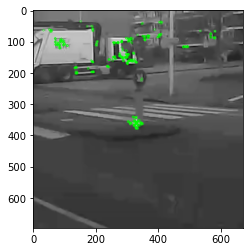

(<matplotlib.image.AxesImage at 0x16c314e50>, None)

In [7]:
img = cv.imread('./test1/ex1.png', 0)

# Initiate ORB detector
orb = cv.ORB_create()

# find the keypoints with ORB
kp = orb.detect(img,None)

# compute the descriptors with ORB
kp, des = orb.compute(img, kp)

# draw only keypoints location,not size and orientation
img2 = cv.drawKeypoints(img, kp, None, color=(0,255,0), flags=0)

plt.imshow(img2), plt.show()

In [8]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

# Initiate FAST object with default values
fast = cv.FastFeatureDetector_create()

# find and draw the keypoints
kp = fast.detect(img,None)
img2 = cv.drawKeypoints(img, kp, None, color=(255,0,0))

# Print all default params
print( "Threshold: {}".format(fast.getThreshold()) )
print( "nonmaxSuppression:{}".format(fast.getNonmaxSuppression()) )
print( "neighborhood: {}".format(fast.getType()) )
print( "Total Keypoints with nonmaxSuppression: {}".format(len(kp)) )
cv.imwrite('fast_true.png',img2)

# Disable nonmaxSuppression
fast.setNonmaxSuppression(0)
kp = fast.detect(img,None)

print( "Total Keypoints without nonmaxSuppression: {}".format(len(kp)) )
img3 = cv.drawKeypoints(img, kp, None, color=(255,0,0))
cv.imwrite('fast_false.png',img3)

Threshold: 10
nonmaxSuppression:True
neighborhood: 2
Total Keypoints with nonmaxSuppression: 849
Total Keypoints without nonmaxSuppression: 6101


True

Total Keypoints without nonmaxSuppression: 949852


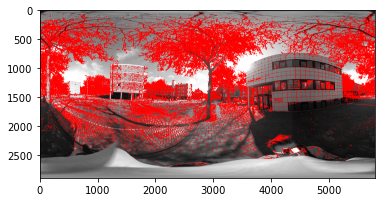

(<matplotlib.image.AxesImage at 0x16c52c1c0>, None)

In [29]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

imga = cv.imread('./test1/img2.jpg', 0)

# Initiate FAST object with default values
fast = cv.FastFeatureDetector_create()

# Disable nonmaxSuppression
fast.setNonmaxSuppression(0)
kpa = fast.detect(imga,None)

print( "Total Keypoints without nonmaxSuppression: {}".format(len(kpa)) )
imga2 = cv.drawKeypoints(imga, kpa, None, color=(255,0,0))
plt.imshow(imga2), plt.show()

Total Keypoints without nonmaxSuppression: 6101


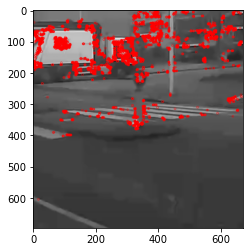

(<matplotlib.image.AxesImage at 0x16f0f50d0>, None)

In [11]:
imgb = cv.imread('./test1/img1.png', 0)
kpb = fast.detect(imgb,None)

print( "Total Keypoints without nonmaxSuppression: {}".format(len(kpb)) )
imgb2 = cv.drawKeypoints(imgb, kpb, None, color=(255,0,0))
plt.imshow(imgb2), plt.show()

In [30]:
kp1, des1 = fast.detectAndCompute(imgb, None)

# create BFMatcher object
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(des1,des2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 10 matches.
img3 = cv.drawMatches(img1,kp1,img2,kp2,matches[:50],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3), plt.show()
cv.imwrite('out.jpg', img3)

error: OpenCV(4.5.1) /private/var/folders/nz/vv4_9tw56nv9k3tkvyszvwg80000gn/T/pip-req-build-yaf6rry6/opencv/modules/features2d/src/feature2d.cpp:174: error: (-213:The function/feature is not implemented)  in function 'detectAndCompute'


In [27]:
img1 = cv.imread('./test1/img5.png',cv.IMREAD_GRAYSCALE)          # queryImage
img2 = cv.imread('./test1/img2.jpg',cv.IMREAD_GRAYSCALE) # trainImage

# Initiate ORB detector
orb = cv.ORB_create()
# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

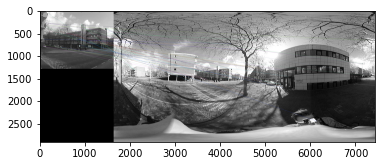

True

In [28]:
# create BFMatcher object
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des1,des2)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
# Draw first 10 matches.
img3 = cv.drawMatches(img1,kp1,img2,kp2,matches[:50],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3), plt.show()
cv.imwrite('out.jpg', img3)